## Solucionario reporte 7:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

## 1. Ploteo de histogramas

In [2]:
#importar base de datos
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
data.head()


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [3]:
# creación nueva columna con los tres tipos de modealidad
data_2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" 
 ))) 

data_2.head()


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online


In [4]:
# creación de las variables dummies
data_3 = pd.get_dummies(data_2, columns = ["class_format"])
data_3


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1,0,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,0,0,1


### Blended:

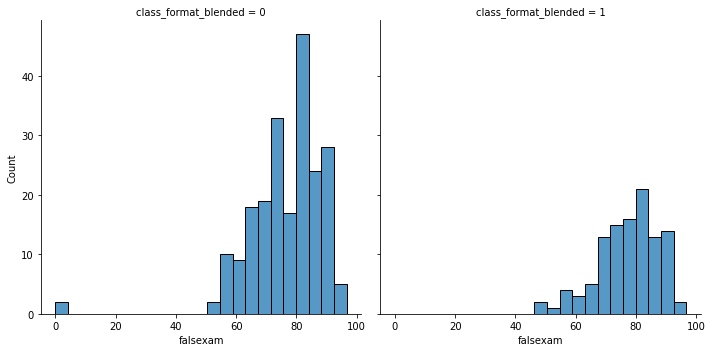

In [38]:
# Histograma a partir de la dummie blended
sns.displot(data_3, x = "falsexam", col = "class_format_blended")


<Figure size 1008x720 with 0 Axes>

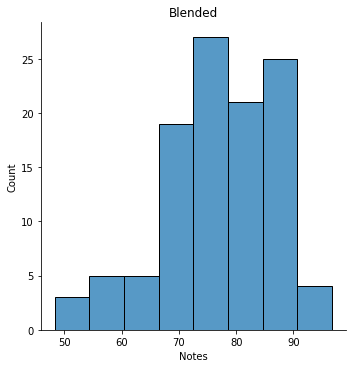

In [6]:
# Histograma solo con los casos positivos de la variable blended
plt.figure(figsize=(14,10))

blended = data_3.loc[data_3['class_format_blended'] == 1]
ax = sns.displot(blended, x = "falsexam")

plt.title('Blended')
plt.xlabel('Notes')
plt.ylabel('Count')
plt.show()


### Face to face

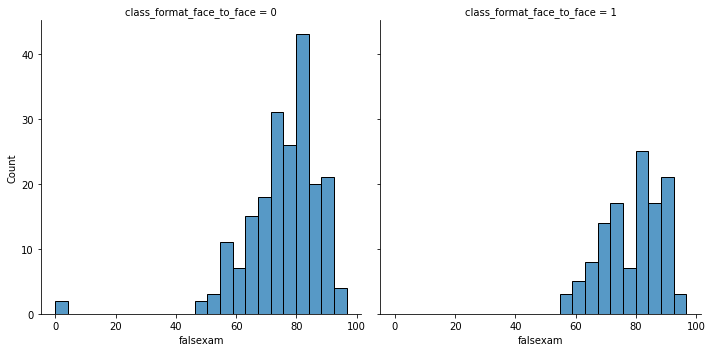

In [53]:
# Histograma a partir de la dummie face to face
sns.displot(data_3, x = "falsexam", col = "class_format_face_to_face")


<Figure size 1008x720 with 0 Axes>

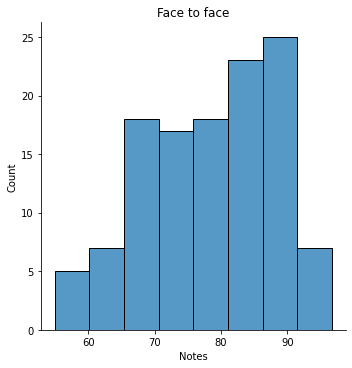

In [13]:
# Histograma solo con los casos positivos de la variable face to face
plt.figure(figsize=(14,10))

face_to_face = data_3.loc[data_3['class_format_face_to_face'] == 1]
ax = sns.displot(face_to_face, x = "falsexam")

plt.title('Face to face')
plt.xlabel('Notes')
plt.ylabel('Count')
plt.show()


### Online

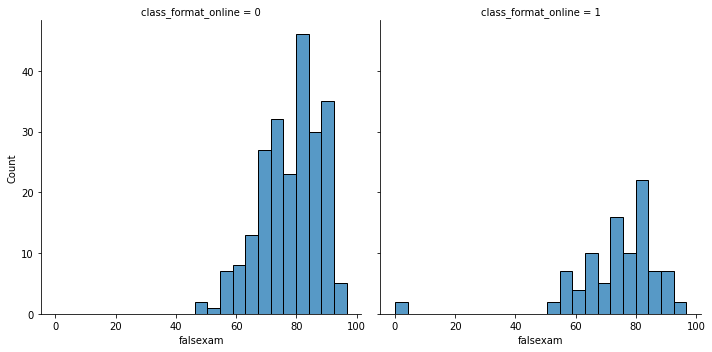

In [57]:
# Histograma a partir de la dummie online
sns.displot(data_3, x = "falsexam", col = "class_format_online")


<Figure size 1008x720 with 0 Axes>

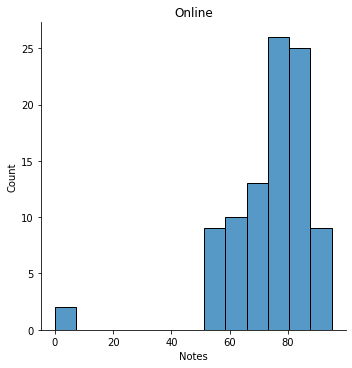

In [14]:
# Histograma solo con los casos positivos de la variable online
plt.figure(figsize=(14,10))

online = data_3.loc[data_3['class_format_online'] == 1]
ax = sns.displot(online, x = "falsexam")

plt.title('Online')
plt.xlabel('Notes')
plt.ylabel('Count')
plt.show()


#### Interpretación histogramas:

## 2. Diferencias en medias:

In [25]:
# nuevo dataset donde solo incluyan los grupos face to face y online
data_4 = data_3.loc[(data_3['class_format_face_to_face'] == 1) | (data_3['class_format_online'] == 1)]
data_4


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
5,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,88.34996,0,0,1
7,1,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,90.00000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,91.65000,0,1,0
317,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,84.99000,0,1,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1


In [21]:
# Promedio para los dos grupos
data_5 = (data_4
       .groupby(['class_format_online', 'class_format_face_to_face'])
       .agg({'falsexam':'mean'}))
data_5


,,falsexam
class_format_online,class_format_face_to_face,
0,1,78.547485
1,0,73.635263


In [22]:
# Diferencia entre las medias
diff = 73.635263 - 78.547485
diff

-4.912222

- *ATE*: Se observa que los estudiantes que recibieron clases de forma presencial obtuvieron mejores notas (con nota promedio de 78.547485), en aproximadamente 4.912 puntos, en relación a los alumnos que continuaron en un formato virtual (con nota promedio de 73.635263). 

## 3. Diferencia de medias con regresión linear

In [26]:
# variable dummy: 1 online y 0 face to face
data_6 = (data_4
       .groupby(['class_format_online'])
       .agg({'falsexam':'mean'}))
data_6


,falsexam
class_format_online,
0,78.547485
1,73.635263


In [28]:
# primera forma de hacer una regresión
ols_reg = sm.OLS.from_formula("falsexam ~ class_format_online", 
              data = data_4).fit()

ols_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Thu, 10 Nov 2022   Prob (F-statistic):            0.00382
Time:                        10:44:33   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              78.5475      1.113     70.563      0.000      76.353      80.742
class_format_online    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# segunda forma de hacer una regresión
mod = smf.ols(formula='falsexam ~ class_format_online', data = data_4)
res = mod.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Mon, 07 Nov 2022   Prob (F-statistic):            0.00382
Time:                        15:55:26   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              78.5475    

- *OLS*: Observando el coeficiente de la variable del formato de clase, este valor coincide al ATE encontrado en la sección anterior. De esta manera, se puede afirmar que los estudiantes que recibieron clases virtuales tienden a obtener notas menores en aproximadamente 4.9122 puntos en relación a los que llevaron clases presenciales.